In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [298]:
df = pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

In [299]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

### X2: Gender (1 = male; 2 = female)

### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

### X4: Marital status (1 = married; 2 = single; 3 = others)

### X5: Age (year)

### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005

### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005

In [300]:
df.shape

(30000, 25)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [302]:
df.drop(['ID'], axis=1, inplace=True)

In [303]:
df.shape

(30000, 24)

In [304]:
df.rename({'default.payment.next.month':'DEFAULT'}, axis=1, inplace=True)

In [305]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

<AxesSubplot:>

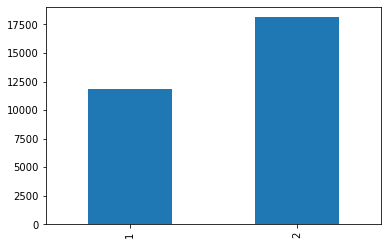

In [306]:
df['SEX'].value_counts().plot.bar()

<AxesSubplot:>

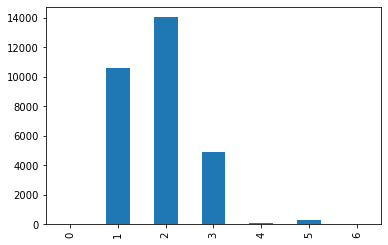

In [307]:
df['EDUCATION'].value_counts().plot.bar()

#### for some reason, in addition to the allowed numbers 1,2,3 and 4, "EDUCATION" also contains 0,5 and 6. it is possible that 0 represents missing data and 5 and 6 represent categories not mentioned in the specification, but that is just a guess.

<AxesSubplot:>

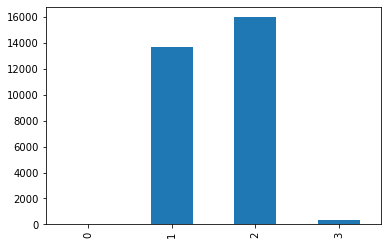

In [308]:
df['MARRIAGE'].value_counts().plot.bar()

In [309]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

#### Like EDUCATION, MARRIAGE contains 0, which i'm guessing represents missing data

## Now DEALING WITH MISSING DATA(values that has 0 in their categories)

In [310]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

out of 30,000 records 68 records contains missing values that means less than 1% contains missing values,so we can simply remove these records from the dataset.

In [311]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [312]:
len(df_no_missing)

29932

In [313]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [314]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

In [315]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [316]:
df_no_default_downsampling = resample(df_no_default,
                                     replace=False,
                                     n_samples=5000,
                                     random_state=8)
len(df_no_default_downsampling)

5000

In [317]:
df_default_downsampling = resample(df_default,
                                replace=False,
                                n_samples=5000,
                                random_state=8)
len(df_default_downsampling)

5000

In [318]:
data = pd.concat([df_no_default_downsampling, df_default_downsampling])
len(data)

10000

## Now split the data into independent(X) and dependent(y) variable

In [319]:
X = data.drop('DEFAULT', axis=1).copy()
y = data['DEFAULT']

In [320]:
print("X shape is:", X.shape)
print("y shape is:", y.shape)

X shape is: (10000, 23)
y shape is: (10000,)


## Now doing the one hot encoding for the categorical data using pandas inbuild get_dummies

In [321]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'],
                                       drop_first=True)

In [322]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
6721,140000.0,55,162452.0,164055.0,141301.0,99115.0,101597.0,101290.0,5000.0,140000.0,...,0,0,1,0,0,0,0,0,0,0
11512,240000.0,32,4101.0,7101.0,5500.0,5500.0,5500.0,5463.0,8500.0,5500.0,...,0,1,0,0,0,0,0,0,0,0
8254,30000.0,22,2949.0,19689.0,17681.0,17113.0,13368.0,11739.0,19689.0,2092.0,...,0,0,0,1,0,0,0,0,0,0
10821,160000.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1241,70000.0,32,18317.0,17330.0,11400.0,11120.0,10914.0,11315.0,0.0,1000.0,...,0,1,0,0,0,0,0,0,0,0


## Now we do Scaling

* ### we split the data into training and testing datasets and then scale them separately to avoid Data Leakage.
* ### Data Leakage occurs when information about the training dataset corrupts or influences the testing dataset.

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=8)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Build a preliminary SVM

In [324]:
clf_svm = SVC(random_state=8)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=8)

## we've build a Support Vector Machine for classification, let's see how it performs on the training dataset and draw a confusion matrix.

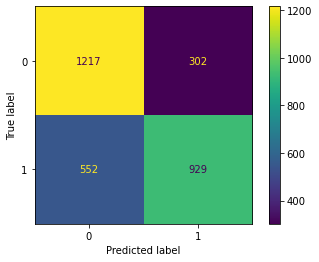

In [325]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test)

In [326]:
y_pred = clf_svm.predict(X_test_scaled)

In [327]:
y_pred[0:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [328]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7153333333333334

In [329]:
from sklearn.model_selection import cross_val_score
score  = cross_val_score(clf_svm, X_test_scaled, y_test, cv=5)

In [330]:
svm_cross_validation_score = score.mean()
print("svm_cross_validation_score: {}".format(svm_cross_validation_score))

svm_cross_validation_score: 0.713


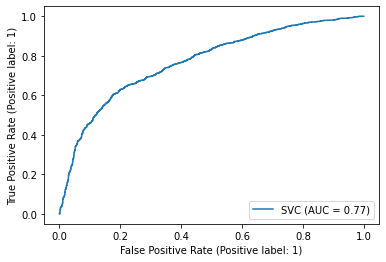

In [331]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_svm,X_test_scaled,y_test)

# Random Forest Classifier

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
rf_clf = RandomForestClassifier(n_jobs= 4 ,
                                random_state=8,
                                criterion= 'gini',
                                n_estimators= 100,
                                verbose= 50)

In [334]:
rf_clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s

building tree 6 of 100[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s

building tree 7 of 100[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s

building tree 9 of 100[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s

building tree 10 of 100[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.1s

building tree 11 of 100[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.1s

building tree 12 of 100
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.1s
building tree 13 of 100[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.1s

building tree 14 of 100
[Parallel(n_jobs=4)]: Done  10 tasks      | 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(n_jobs=4, random_state=8, verbose=50)

In [335]:
rf_y_pred=rf_clf.predict(X_test_scaled)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

In [336]:
rf_y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [337]:
from sklearn import metrics

In [338]:
accuracy = metrics.accuracy_score(y_test, rf_y_pred)

In [339]:
print("Random Forest Accuracy score: ", accuracy)

Random Forest Accuracy score:  0.7206666666666667


In [340]:
rf_clf.feature_importances_

array([6.52866008e-02, 5.98234610e-02, 5.73924127e-02, 5.29069871e-02,
       5.01136244e-02, 4.91628236e-02, 4.87703191e-02, 4.73947493e-02,
       5.67939328e-02, 4.93641385e-02, 4.59210733e-02, 4.36960629e-02,
       4.20503427e-02, 4.37207030e-02, 1.30319859e-02, 1.18493268e-02,
       8.88781089e-03, 8.09272128e-04, 1.08440605e-03, 4.16238187e-04,
       1.22613367e-02, 1.90990128e-03, 6.62809854e-03, 2.36896837e-02,
       7.61298021e-03, 4.99006511e-02, 1.67021644e-03, 2.04213202e-04,
       1.37676902e-04, 7.48258568e-05, 5.67040242e-06, 1.47680961e-05,
       5.49548902e-03, 7.20056791e-03, 2.45616985e-04, 2.65376235e-02,
       2.32685739e-03, 2.79856221e-04, 6.58414556e-05, 1.72545510e-05,
       7.37385116e-05, 5.21807132e-03, 6.63615095e-03, 1.87348194e-05,
       2.06136959e-02, 7.40561420e-04, 2.36330789e-04, 5.74744791e-05,
       5.04096876e-05, 1.82887896e-05, 0.00000000e+00, 4.60279942e-03,
       5.23041676e-03, 0.00000000e+00, 1.50220063e-02, 4.54010947e-04,
      

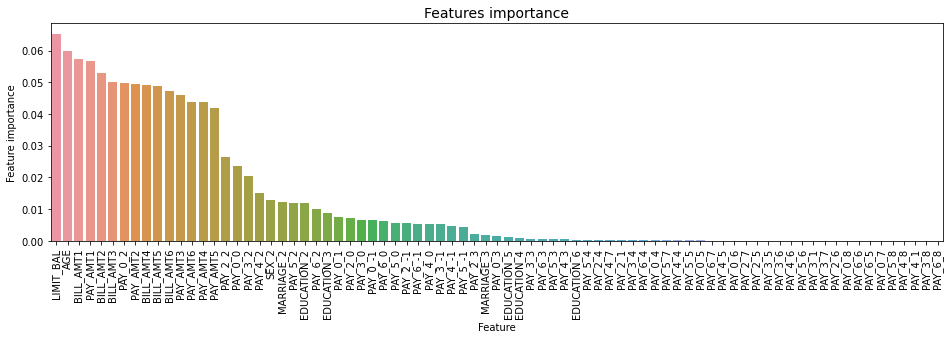

In [341]:
tmp = pd.DataFrame({'Feature': X_encoded.columns, 'Feature importance': rf_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

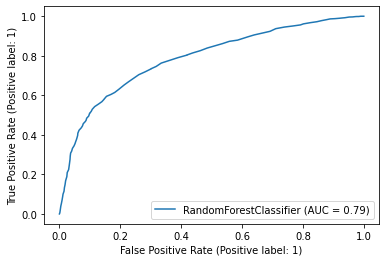

In [372]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_clf,X_test_scaled,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

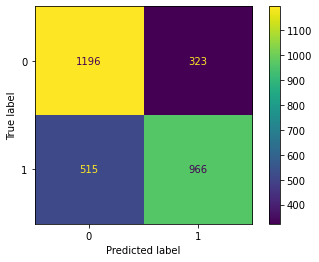

In [343]:
plot_confusion_matrix(rf_clf,
                     X_test_scaled,
                     y_test)

# ADABOOST Classifier

In [344]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=8,
                             algorithm='SAMME.R',
                             learning_rate=0.05,
                             n_estimators=100)

In [345]:
ada_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=8)

In [346]:
ada_y_pred = ada_clf.predict(X_test)

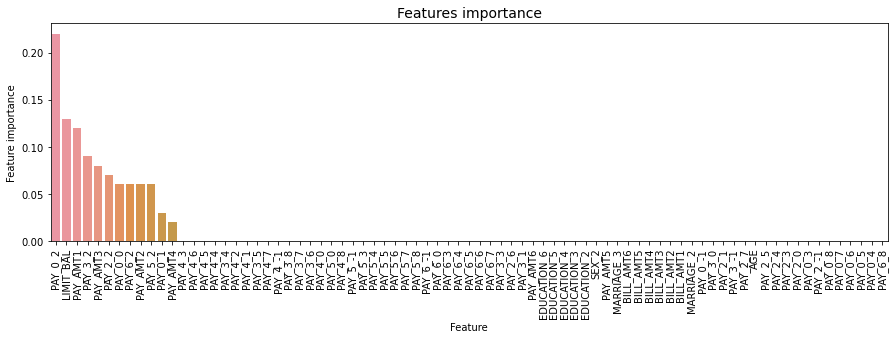

In [347]:
tmp = pd.DataFrame({'Feature': X_encoded.columns, 'Feature importance': ada_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (15,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

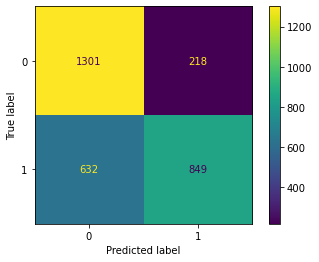

In [348]:
plot_confusion_matrix(ada_clf,
                     X_test_scaled,
                     y_test)

In [349]:
accuracy = metrics.accuracy_score(y_test,ada_y_pred)

In [350]:
accuracy

0.664

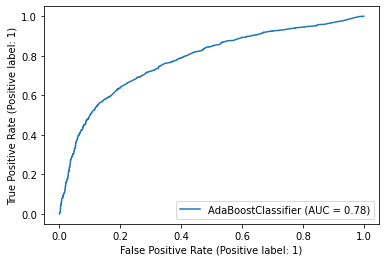

In [351]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(ada_clf,X_test_scaled,y_test)

# XGBOOST Classifier

In [352]:
from xgboost import XGBClassifier

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.04
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metrics'] = 'auc'
params['random_state'] = 8

xgb_clf = XGBClassifier(**params)

In [353]:
xgb_clf.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:26] WARNING: ../src/learner.cc:541: 
Parameters: { eval_metrics, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:23:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eta=0.04,
              eval_metrics='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0399999991,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [354]:
xgb_y_pred = xgb_clf.predict(X_test_scaled)

In [355]:
xgb_y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [356]:
accuracy = metrics.accuracy_score(y_test,xgb_y_pred)

In [357]:
accuracy

0.7203333333333334

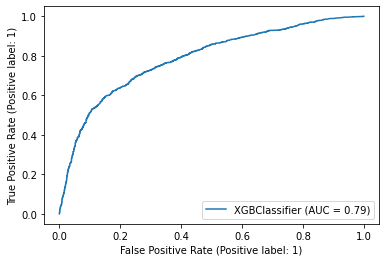

In [358]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(xgb_clf,X_test_scaled,y_test)

# Let's try xgb with hyperparameter tuning

In [359]:
hparams = {}
hparams['min_child_weight'] = [1,3,5,7,10]
hparams['gamma'] = [0.1,0.5,1,1.5,2,5]
hparams['subsample'] = [0.3,0.6,0.8,1.0]
hparams['colsample_bytree'] = [0.2,0.4,0.6,0.8,1.0]
hparams['max_depth'] = [3,4,5,6]
hparams['learning_rate'] = [0.01, 0.02, 0.1, 0.5]
hparams['n_estimators'] = [100,200,400,500,600]

In [360]:
xgb_hp_clf = XGBClassifier(objective='binary:logistic',silent=True,nthread=1)

In [361]:
from sklearn.model_selection import RandomizedSearchCV

In [362]:
random_search = RandomizedSearchCV(xgb_hp_clf, param_distributions=hparams, n_iter=5, scoring='roc_auc',n_jobs=4, verbose=3, random_state=8)

In [363]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:10] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=4,
                   param_distrib

In [364]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [365]:
random_search.best_params_

{'subsample': 0.3,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 2,
 'colsample_bytree': 0.6}

In [366]:
from numpy import nan

In [367]:
final_xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [368]:
final_xgb_clf.fit(X_train_scaled, y_train)

[12:24:12] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [369]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(final_xgb_clf, X_test_scaled, y_test, cv=10)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:14] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:15] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:16] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:17] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:17] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:18] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:19] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:19] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:20] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:21] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [370]:
score.mean()

0.7246666666666666

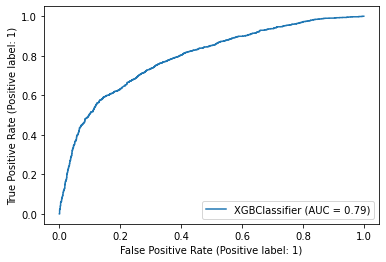

In [371]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_xgb_clf,X_test_scaled,y_test)

# CONCLUSION

* We started with Support Vector Machine, for which we obtained an auc score of 0.77.
* Next we used a RandomForestClassifier, with auc score of 0.79.
* Next we used an AdaBoostClassifier model, with auc score of 0.78.
* In last we used an XGBoost model and got auc score of 0.79. and after than done some HyperParameter tuning to see if there is any change/improvement in the auc score or not. after hyperparameter tuning we got auc score of 0.79.